<a href="https://colab.research.google.com/github/CamillaCavallo/Proyecciones-ventas/blob/main/salespredictions_Pyto1Part5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
filename = '/content/drive/MyDrive/clase data science/sales_predictions.csv'

In [3]:
df = pd.read_csv(filename)
df.head()
#Muestra la cabecera de la trama de datos

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


la data sí continene datos faltantes, para las columnas Weight y Size. teniendo 6113 datos con toda la información.


In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
OutletSize_missing = df['Outlet_Size'].isna()
df.loc[OutletSize_missing,:]

#filas que contienen NAN de oulet size para ver si existe alguna relación. OUT 10, 17, y 45 al parecer no se sabe su tmaño.

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [7]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt


corr_df = df.corr(method='pearson')

corr_df.style.background_gradient(cmap='coolwarm')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [8]:
df['Outlet_Type'].unique() # para ver los tipos de tiendas

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [9]:
G2 = df.groupby(['Outlet_Type'])[['Outlet_Identifier']].nunique() #detalle tipos de tiendas
G2

,Outlet_Identifier
Outlet_Type,
Grocery Store,2
Supermarket Type1,6
Supermarket Type2,1
Supermarket Type3,1


In [10]:
G3 = df.groupby(['Outlet_Type','Outlet_Identifier'])[['Outlet_Identifier']].nunique() #detalle tipos de tiendas
G3

Outlet_Identifier
Outlet_Type       Outlet_Identifier                   
Grocery Store     OUT010                             1
                  OUT019                             1
Supermarket Type1 OUT013                             1
                  OUT017                             1
                  OUT035                             1
                  OUT045                             1
                  OUT046                             1
                  OUT049                             1
Supermarket Type2 OUT018                             1
Supermarket Type3 OUT027                             1

In [11]:
#G2 = df.groupby(['Outlet_Identifier', 'Outlet_Size', 'Outlet_Type'])[['Outlet_Identifier']].nunique() #detalle tipos de tiendas
#G2

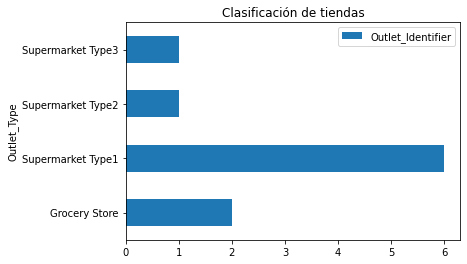

In [12]:
G2.plot.barh()
plt.title("Clasificación de tiendas")
plt.show()

In [13]:
#ventas por outlet
ventas = df.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].sum().sort_values()
ventas

Outlet_Identifier
OUT019    1.796941e+05
OUT010    1.883402e+05
OUT018    1.851823e+06
OUT045    2.036725e+06
OUT046    2.118395e+06
OUT013    2.142664e+06
OUT017    2.167465e+06
OUT049    2.183970e+06
OUT035    2.268123e+06
OUT027    3.453926e+06
Name: Item_Outlet_Sales, dtype: float64

In [14]:
#ventas por canal

df2=df.groupby(['Outlet_Type'])[['Item_Outlet_Sales']].sum()
df2

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,3.680343e+05
Supermarket Type1,1.291734e+07
Supermarket Type2,1.851823e+06
Supermarket Type3,3.453926e+06


In [15]:
#media de ventas por canal

df3=df.groupby(['Outlet_Type'])[['Item_Outlet_Sales']].mean()
df3

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


(array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.,
        3000000., 3500000., 4000000.]),
 <a list of 9 Text major ticklabel objects>)

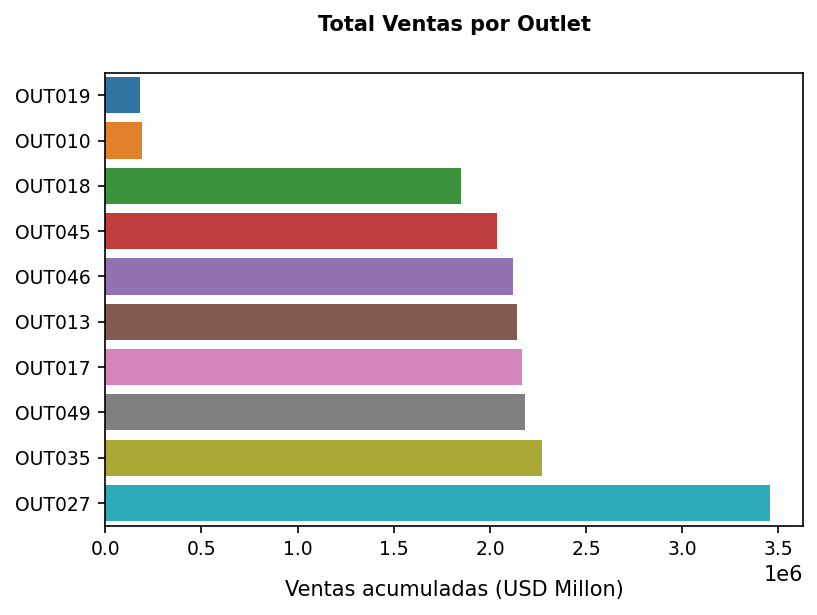

In [16]:
fig1 = plt.figure(dpi=150)
ax = fig1.add_subplot(111)
ax = sns.barplot(y=ventas.index, x=ventas.values)



#ax.bar_label(ax.containers[0],fmt = '%d', fontsize=12, padding=4)
# Se definen el título y el label para el eje x
ax.set_title("Total Ventas por Outlet", {'fontsize': 10, 'fontweight':"bold"}, pad=20)
ax.set_xlabel("Ventas acumuladas (USD Millon)", fontsize= 10, labelpad=10)
ax.set_ylabel("")
plt.yticks(fontsize=9)
plt.xticks(fontsize=9)

In [17]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


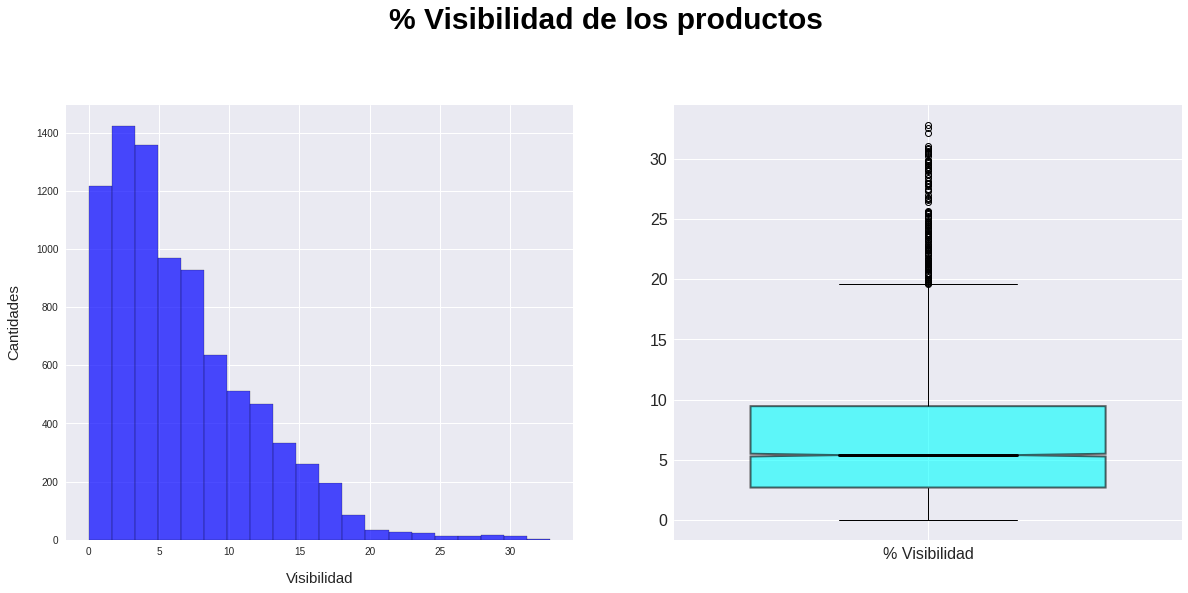

In [18]:
vis = df['Item_Visibility']*100

fig1 = plt.figure(figsize=(20, 8))
fig1.suptitle("% Visibilidad de los productos",fontsize=30, fontweight='bold', y=1.05)
plt.style.use('seaborn')


# Se añade un subplot de una fila dos columnas, este subplot es el primero de la fila
ax1 = fig1.add_subplot(1,2,1) #1ra fila, 1ra columna, gráfico 1.
vis.hist(bins = 20, color='b', edgecolor='k', alpha=.7)
plt.xlabel("Visibilidad", size=15, labelpad=15)
plt.ylabel("Cantidades", size=15, labelpad=15)
plt.ticklabel_format(useOffset=False, style='plain')
# plt.title("Distribuición en visibilidad de productos", size=20, pad=14)

ax2 = fig1.add_subplot(1,2,2) #1ra fila, 1ra columna, gráfico 1.
boxplots = ax2.boxplot(vis,
           notch = True,
           labels=["% Visibilidad"],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=3, color='black'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'yellow', alpha = .6)
          );

boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('cyan')
# plt.title('Pesos de cada producto', fontsize = 20, pad=15);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

el objetivo de esto es ayudar al minorista a comprender las propiedades de los productos y puntos de venta que juegan un papel crucial en el aumento de las ventas. Modelo para predecir "Item_Outlet_Sales", construir el modelo y evaluarlo. qué características están más asociadas con la predicción de ventas mayores?

Cambiando variables categóricas

In [29]:
import pandas as pd
import numpy as np

In [31]:
df4=df

df4['Outlet_Location_Type'] = df4['Outlet_Location_Type'].replace("Tier 1",1)
df4['Outlet_Location_Type'] = df4['Outlet_Location_Type'].replace("Tier 2",2)
df4['Outlet_Location_Type'] = df4['Outlet_Location_Type'].replace("Tier 3",3)

In [32]:
df4

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,3,Supermarket Type2,1845.5976


In [33]:
df4['Outlet_Type'] = df4['Outlet_Type'].replace("Grocery Store",4)
df4['Outlet_Type'] = df4['Outlet_Type'].replace("Supermarket Type1",1)
df4['Outlet_Type'] = df4['Outlet_Type'].replace("Supermarket Type2",2)
df4['Outlet_Type'] = df4['Outlet_Type'].replace("Supermarket Type3",3)

In [34]:
df4


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,1,1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,3,2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,1,1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,3,4,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,3,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,3,1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,2,1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,2,1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,3,2,1845.5976


In [37]:
df4["Item_Fat_Content"] = df4["Item_Fat_Content"].replace("Low Fat",1)
df4["Item_Fat_Content"] = df4["Item_Fat_Content"].replace("Regular",2)


In [39]:
df4

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,1,0.016047,Dairy,249.8092,OUT049,1999,Medium,1,1,3735.1380
1,DRC01,5.920,2,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,3,2,443.4228
2,FDN15,17.500,1,0.016760,Meat,141.6180,OUT049,1999,Medium,1,1,2097.2700
3,FDX07,19.200,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,3,4,732.3800
4,NCD19,8.930,1,0.000000,Household,53.8614,OUT013,1987,High,3,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,1,0.056783,Snack Foods,214.5218,OUT013,1987,High,3,1,2778.3834
8519,FDS36,8.380,2,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,2,1,549.2850
8520,NCJ29,10.600,1,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,2,1,1193.1136
8521,FDN46,7.210,2,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,3,2,1845.5976


In [40]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt


corr_df4 = df4.corr(method='pearson')

corr_df4.style.background_gradient(cmap='coolwarm')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.004715,0.003890,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.028099,0.223308,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.000232,-0.006671,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.089216,-0.433070,-0.049135
Outlet_Location_Type,0.004715,-0.028099,0.000232,-0.089216,1.000000,0.290939,0.089367
Outlet_Type,0.003890,0.223308,-0.006671,-0.433070,0.290939,1.000000,-0.209854
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,0.089367,-0.209854,1.000000


In [53]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 799.2+ KB


In [55]:
df5 = df4.dropna(subset=df.columns.values)

In [56]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4650 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            4650 non-null   object 
 1   Item_Weight                4650 non-null   float64
 2   Item_Fat_Content           4650 non-null   object 
 3   Item_Visibility            4650 non-null   float64
 4   Item_Type                  4650 non-null   object 
 5   Item_MRP                   4650 non-null   float64
 6   Outlet_Identifier          4650 non-null   object 
 7   Outlet_Establishment_Year  4650 non-null   int64  
 8   Outlet_Size                4650 non-null   object 
 9   Outlet_Location_Type       4650 non-null   int64  
 10  Outlet_Type                4650 non-null   int64  
 11  Item_Outlet_Sales          4650 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 472.3+ KB


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

DATASET

In [58]:
X = df5[['Item_Visibility','Item_MRP',"Outlet_Establishment_Year",'Item_Weight','Outlet_Type']].values
y = df5['Item_Outlet_Sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Creamos el Modelo


In [61]:
#Realizamos iteraciones para "N° de vecinos" y nos quedamos con el mejor equilibrio para el nivel de precision de test y entrenamiento.

n_neighbors =2

knn = KNeighborsRegressor(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.73
Accuracy of K-NN classifier on test set: 0.18
